# Graph Learning
## Lab 4: Hierarchical Clustering

In this lab, you will learn to analyse the hierarchical structure of a graph.

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
<bold>Done in pair:</bold>
<br>
Rafaela de Carvalho Machado Pinheiro
<br>
Bárbara Barsi Duarte Batista da Silva
</div>

## Import

In [160]:
from IPython.display import SVG

In [161]:
import numpy as np
from scipy import sparse

In [162]:
!pip install scikit-network

In [163]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainIteration, Paris, cut_straight
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)

In [164]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a small graph with ground-truth clusters.

In [165]:
dataset = karate_club(True)

In [166]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

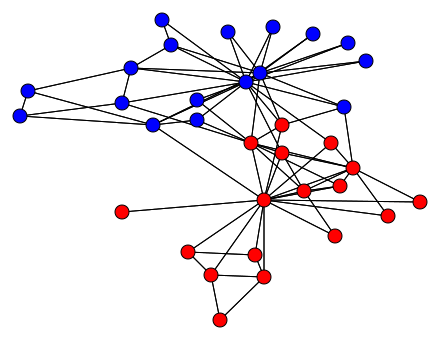

In [167]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm (divisive algorithm, top-down).
* Display the dendrogram.
* How many clusters are there at depth 1?
* Display the graph with the corresponding clustering.
* How many clusters are there at depth 2?

In [168]:
louvain = LouvainIteration()

In [169]:
dendrogram = louvain.fit_predict(adjacency)

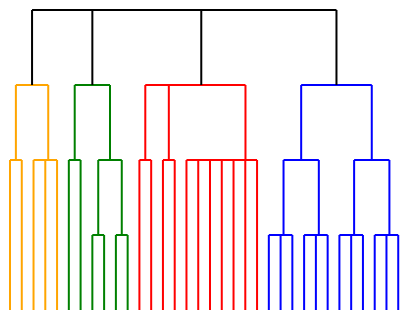

In [170]:
image = visualize_dendrogram(dendrogram)
SVG(image)

In [171]:
# find a clustering with n_clusters (at least n_clusters, if there is no cut with n_clusters)
labels_d1 = cut_straight(dendrogram, n_clusters=2)

In [172]:
len(set(labels_d1))

4

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer</strong>
  <br>
  With depth = 1, we would get at least 2 clusters, but from the new labels obtained with `cut_straight`, we see there are 4 clusters in this case.
  <br>
</div>

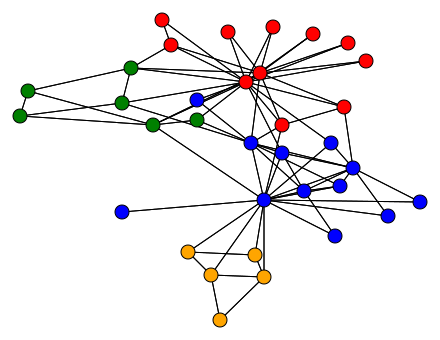

In [173]:
image = visualize_graph(adjacency, position, labels=labels_d1)
SVG(image)

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
  <strong>Answer</strong>
  <br>
  Given the 4 clusters at depth 1 above, at depth 2 we would get at least 5 clusters.
  <br>
</div>

In [174]:
labels_d2 = cut_straight(dendrogram, n_clusters=5)

In [175]:
len(set(labels_d2))

9

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. Compare this clustering to the ground-truth labels.
* Display the graph with the top-4 clusters. Compare this clustering with that given by Louvain (depth 1).
* Display the corresponding aggregate dendrogram (check the parameters of the function ``cut_straight``).

In [176]:
paris = Paris()

In [177]:
dendrogram = paris.fit_predict(adjacency)

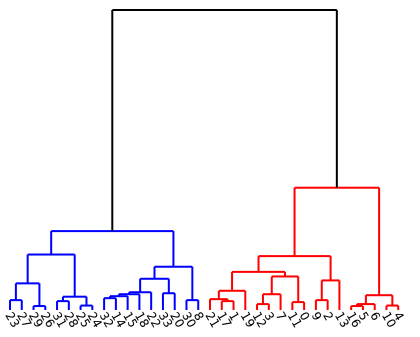

In [178]:
image = visualize_dendrogram(dendrogram, names=np.arange(34))
SVG(image)

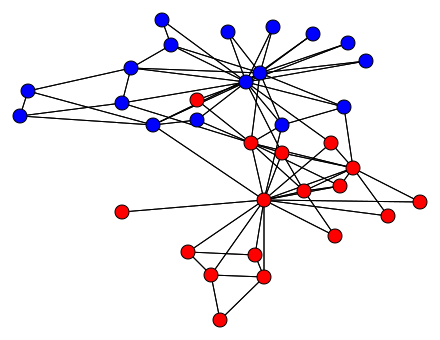

In [179]:
# top 2 clusters
labels = cut_straight(dendrogram, n_clusters=2)
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

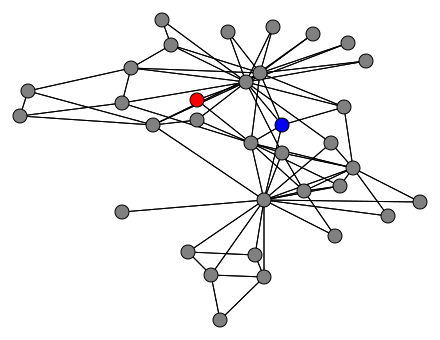

In [180]:
wrong_classif = np.flatnonzero(labels != labels_true)
image = visualize_graph(adjacency, position, labels={i: labels[i] for i in wrong_classif})
SVG(image)

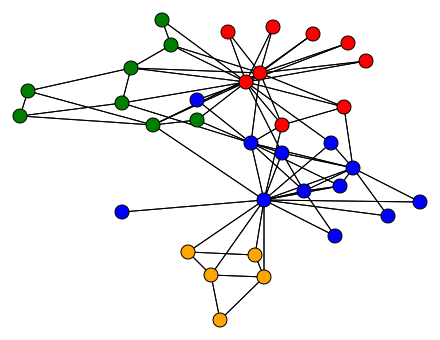

In [184]:
# top 4 clusters
labels_top4 = cut_straight(dendrogram, 4)
image = visualize_graph(adjacency, position, labels=labels_top4)
SVG(image)

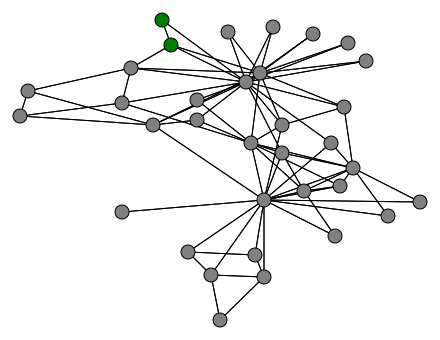

In [185]:
dendrogram_louvain = louvain.fit_predict(adjacency)
labels_d1 = cut_straight(dendrogram_louvain, n_clusters=2)
difference = np.flatnonzero(labels_d1 != labels_top4)
image = visualize_graph(adjacency, position, labels={i: labels_top4[i] for i in difference})
SVG(image)

In [ ]:
# aggregate dendrogram


## Openflights


In [ ]:
dataset = openflights

In [ ]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

In [ ]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.<br>
Refer to the [tutorial on Louvain](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html) to display the aggregate graph.
* Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>Check the parameters of the function ``visualize_dendrogram`` for better visualization.

## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
dataset = wikivitals

In [ ]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles (in terms of Personalized PageRank) of each of the top-40 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters, with the name of the top article of each cluster. Comment the results.


## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.
* Do the same with another article of your choice.

In [ ]:
def get_nested_clusters(dendrogram: np.ndarray, node: int):
    '''Get the nested clusters of a node, following the path from the corresponding leaf to the root in the dendrogram.

    Parameters
    ----------
    dendrogram:
        Dendrogram
    node:
        Target node

    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes
        (the k-th nested cluster is the concatenation of the first k lists).

    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_nested_clusters(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1

    cluster = {i: [i] for i in range(n)}
    nested_clusters = [[node]]
    cluster_index = node

    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed

    return nested_clusters